In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

# 데이터 탐색

In [3]:
data = pd.read_csv('/JupyterNotbook/Data_Analytics/data/personalities.csv')
print(data.shape)
data.head(20)

(315, 8)


,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
5,Female,19,6,4,7,5,5,serious
6,Female,24,1,2,7,4,6,extraverted
7,Male,27,4,5,7,4,4,serious
8,Male,20,6,4,5,6,6,serious
9,Male,21,5,4,4,6,4,serious


<AxesSubplot:>

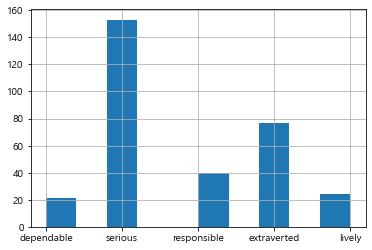

In [7]:
data['Personality'].hist()

In [128]:
df = data.drop(['gender', 'age'], axis=1)

In [129]:
df.set_index(['Personality'])

,openness,neuroticism,conscientiousness,agreeableness,extraversion
Personality,,,,,
dependable,7,9,9,5,5
serious,5,4,5,2,4
serious,5,5,7,2,4
serious,6,2,7,4,7
responsible,2,4,7,1,3
...,...,...,...,...,...
extraverted,6,5,6,4,3
dependable,2,5,8,3,7
serious,7,5,6,2,7


In [130]:
df.describe()

,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000
mean,4.850794,4.584127,4.812698,4.844444,4.926984
std,1.537211,1.818623,1.786315,1.718555,1.466527
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000
max,8.000000,9.000000,9.000000,8.000000,8.000000


### Data for Clustering

In [142]:
big5 = data[['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']]
raw = data[['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']]
big5

,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,7,9,9,5,5
1,5,4,5,2,4
2,5,5,7,2,4
3,6,2,7,4,7
4,2,4,7,1,3
...,...,...,...,...,...
310,6,5,6,4,3
311,2,5,8,3,7
312,7,5,6,2,7
313,6,7,5,4,3


In [133]:
target = data[['Personality']]
target

,Personality
0,dependable
1,serious
2,serious
3,serious
4,responsible
...,...
310,extraverted
311,dependable
312,serious
313,extraverted


## 1. Cleaning

In [134]:
df.isnull().sum()

openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

## 2. 데이터 범주형 변환

## 3. Scaling

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
big5[['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']] = StandardScaler().fit_transform(big5)
big5

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1.400345,2.432004,2.347830,0.090659,0.049867
1,0.097217,-0.321703,0.105020,-1.657770,-0.633100
2,0.097217,0.229038,1.226425,-1.657770,-0.633100
3,0.748781,-1.423186,1.226425,-0.492151,1.415803
4,-1.857474,-0.321703,1.226425,-2.240580,-1.316068
...,...,...,...,...,...
310,0.748781,0.229038,0.665723,-0.492151,-1.316068
311,-1.857474,0.229038,1.787128,-1.074961,1.415803
312,1.400345,0.229038,0.665723,-1.657770,1.415803
313,0.748781,1.330521,0.105020,-0.492151,-1.316068


In [137]:
df_per = df.groupby('Personality').mean().T
df_per

Personality,dependable,extraverted,lively,responsible,serious
openness,5.428571,5.142857,5.500000,4.450,4.627451
neuroticism,5.190476,5.935065,3.250000,4.250,4.117647
conscientiousness,5.142857,4.207792,5.250000,4.425,5.104575
agreeableness,4.857143,4.896104,5.000000,3.950,5.026144
extraversion,5.333333,4.636364,3.208333,4.125,5.496732


In [138]:
corr = df_per.corr()
corr.loc[:][1.000000] = np.nan

#corr.agg(['min', 'max'])

## 덴드로그램

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage

[[2.         3.         0.92178203 2.        ]
 [0.         5.         1.11602994 3.        ]
 [1.         4.         1.90427668 2.        ]
 [6.         7.         3.25195402 5.        ]]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0]],
 'dcoord': [[0.0, 0.9217820314627717, 0.9217820314627717, 0.0],
  [0.0, 1.1160299426191436, 1.1160299426191436, 0.9217820314627717],
  [0.0, 1.9042766828151798, 1.9042766828151798, 0.0],
  [1.1160299426191436,
   3.2519540241793363,
   3.2519540241793363,
   1.9042766828151798]],
 'ivl': ['dependable', 'lively', 'responsible', 'extraverted', 'serious'],
 'leaves': [0, 2, 3, 1, 4],
 'color_list': ['C1', 'C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2']}

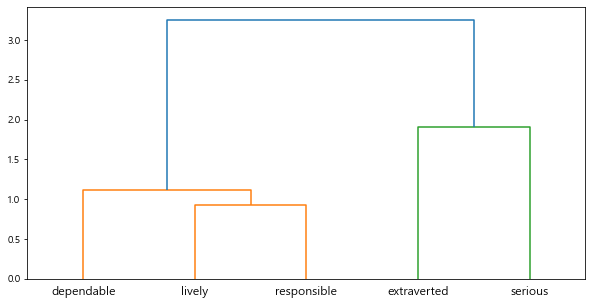

In [140]:
linkdata = linkage(df_per, metric='euclidean', method='ward')
print(linkdata)
plt.figure(figsize=(10, 5))
dendrogram(linkdata, labels=df_per.columns)

[[0.         4.         1.35995672 2.        ]
 [1.         5.         2.03354373 3.        ]
 [2.         3.         2.17391416 2.        ]
 [6.         7.         3.1752041  5.        ]]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0]],
 'dcoord': [[0.0, 1.359956718638781, 1.359956718638781, 0.0],
  [0.0, 2.033543725650116, 2.033543725650116, 1.359956718638781],
  [0.0, 2.173914160627732, 2.173914160627732, 0.0],
  [2.033543725650116,
   3.175204102070541,
   3.175204102070541,
   2.173914160627732]],
 'ivl': ['neuroticism',
  'openness',
  'extraversion',
  'conscientiousness',
  'agreeableness'],
 'leaves': [1, 0, 4, 2, 3],
 'color_list': ['C1', 'C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2']}

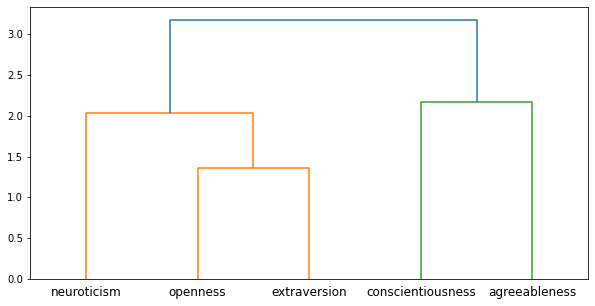

In [78]:
linkdata = linkage(df_per.T, metric='euclidean', method='ward')
print(linkdata)
plt.figure(figsize=(10, 5))
dendrogram(linkdata, labels=df_per.T.columns)

### After StandardScaling

<Figure size 1440x1440 with 0 Axes>

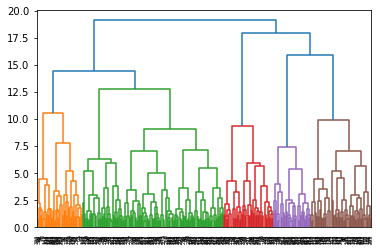

<Figure size 1440x1440 with 0 Axes>

In [88]:
after_std = linkage(big5, metric='euclidean', method='ward')
dendrogram(after_std)
plt.figure(figsize=(20, 20))

# Clustering

In [89]:
from sklearn.cluster import KMeans

In [96]:
n = 5
k = KMeans(n_clusters=n).fit(big5)

In [161]:
centers = k.cluster_centers_
centers

array([[ 0.31828381, -1.21665765, -0.8361586 ,  0.4965448 , -0.08428691],
       [ 0.11696184,  0.30413958,  0.35988518, -0.73057284, -1.28502423],
       [-1.41609232,  0.05137997,  0.34015372,  0.12825996,  0.42439826],
       [ 0.64980968,  0.01989618,  0.73669785,  0.33411157,  0.37838368],
       [ 0.20998816,  0.83273577, -1.0810808 , -0.26799294,  0.64089737]])

In [106]:
colors = list('rcgbk')
n_samples = big5.shape[0]

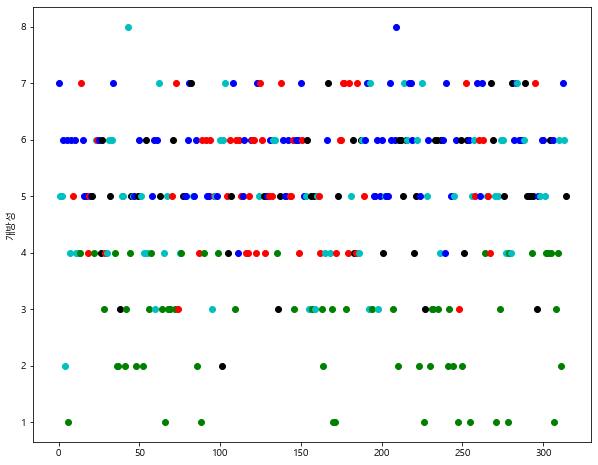

In [163]:
plt.figure(figsize=(10, 8))
plt.ylabel('개방성')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(n, raw['openness'][n], c=colors[label])

유형별 그래프

In [149]:
def a(A):
    plt.figure(figsize=(10, 8))
    plt.ylabel(A)
    for n in range(n_samples):
        label = k.labels_[n]
        plt.scatter(n, raw[A][n], c=colors[label])

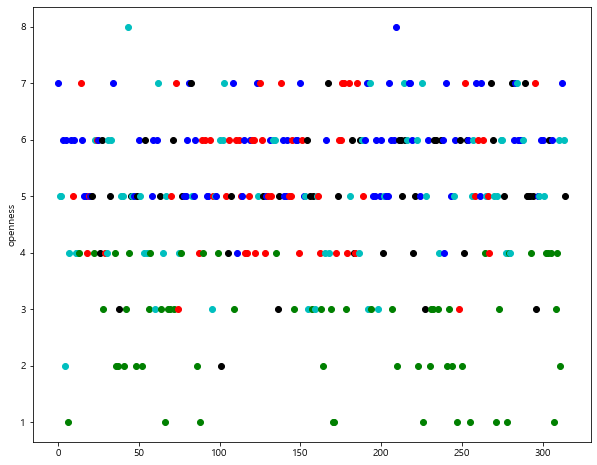

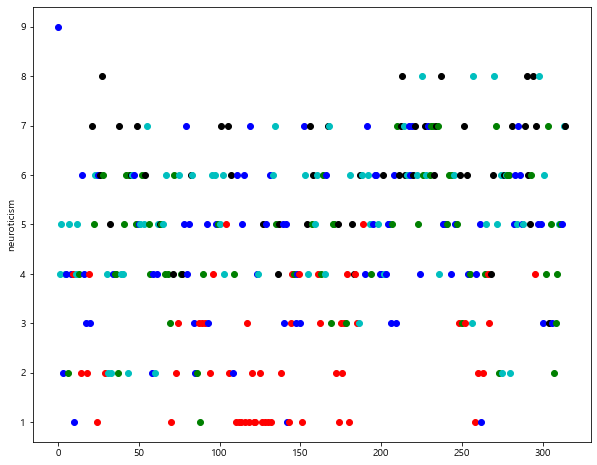

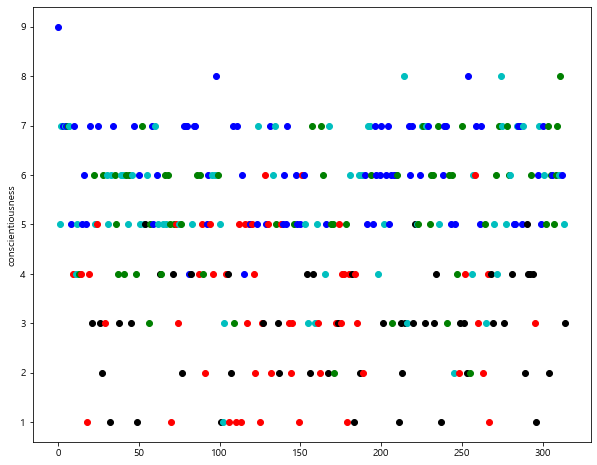

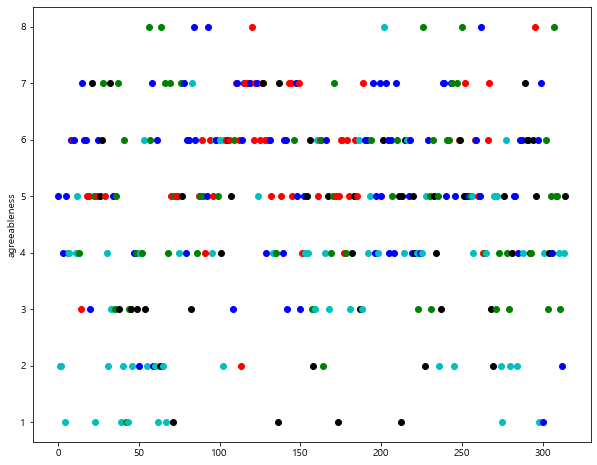

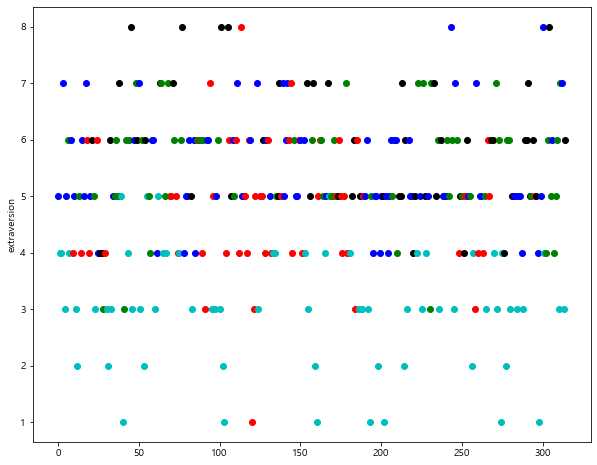

In [150]:
aa = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']
for i in range(5):
    a(aa[i])

### 정오답

In [156]:
y_predict = np.array(k.labels_).reshape(315, 1)
y_predict = pd.DataFrame(y_predict)
y_predict

,0
0,3
1,1
2,1
3,3
4,1
...,...
310,1
311,2
312,3
313,1


In [159]:
ans = pd.concat([target, y_predict], axis=1)
print(ans)
ans.groupby(['Personality', 0]).size()

     Personality  0
0     dependable  3
1        serious  1
2        serious  1
3        serious  3
4    responsible  1
..           ... ..
310  extraverted  1
311   dependable  2
312      serious  3
313  extraverted  1
314  extraverted  4

[315 rows x 2 columns]


Personality  0
dependable   0     5
             1     3
             2     3
             3     7
             4     3
extraverted  0     5
             1    22
             2     7
             3    15
             4    28
lively       0     8
             1    11
             2     1
             3     2
             4     2
responsible  0     8
             1    15
             2     4
             3     5
             4     8
serious      0    30
             1    15
             2    47
             3    50
             4    11
dtype: int64